#GRIP : The Sparks Foundation
## Data Science and Business Analytics Intern
## Author : Satyendra Kumar Verma
## Task 1 : Prediction Using Supervised ML

### In this task we have to predict the percentage score of a student based on the number of hours studied. The task has two variables where the feature is the no. of hours studied and the targated value is the percentage score.This can be solved using simple linear regression.

In [2]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# view data
url="http://bit.ly/w-data"
student_data=pd.read_csv(url)
print("Data Imported Successfully")
student_data.head()

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
# info of data
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
# summary statistics
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
# check for missing value
student_data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [11]:
# check for categories
student_data.nunique()

Hours     23
Scores    23
dtype: int64

Plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

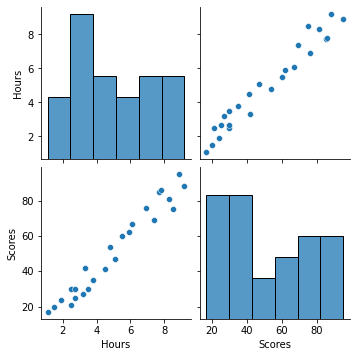

In [12]:
# visualize pairplot
sns.pairplot(student_data)

### **From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [13]:
# columns name
student_data.columns

Index(['Hours', 'Scores'], dtype='object')

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [46]:
X = student_data.iloc[:, :-1].values   
y = student_data.iloc[:, 1].values 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [47]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [48]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


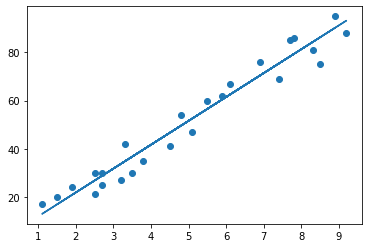

In [49]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [50]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [51]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [62]:
sample=student_data.sample(9)
sample

,Hours,Scores
6,9.2,88
9,2.7,25
16,2.5,30
20,2.7,30
1,5.1,47
5,1.5,20
12,4.5,41
22,3.8,35
3,8.5,75


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [63]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
